##Trabajo de programación Nº 3
##LFIS419 - Inteligencia Artificial
Entrega Miércoles 10 de mayo a través del Aula Virtual

##Instrucciones Generales:

*   Siga las instrucciones del notebook
*   Cambie el Nombre del Archivo, indicando el Nº del trabajo y el número del grupo (para trabajos grupales) o su nombre (para trabajos individuales)
*   Use las celdas de texto, para explicar los objetivos del código y comentar los resultados obtenidos.
*   Use comentarios dentro del código para explicar cómo funciona, por qué usa tal o cual comando, que contienen las variables, etc.
*   Edite la celda siguiente, para completar el nombre, rut y correo del (de los) integrante(s).








## Identificación del (de los) Estudiante(s):
<table>
<tr>
<th> Nombre </th>
<th> RUT </th>
<th> email </th>
</tr>
<tr>
<td> nombre </td>
<td> rut </td>
<td> email </td>
</tr>
</table>

## Instrucciones específicas
En este trabajo exploraremos un dataset usado previamente con técnicas de machine learning y obtenido desde https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease (visitado el 3 de mayo de 2023). Revisar la descripción de estos datos en la página original.

En el aula virtual está disponible el archivo chronic_kidney_disease.arff, el que deben subir a Google Colab y completar las actividades descritas.

El objetivo es crear un modelo de ML para predecir la presencia o no de la enfermedad de riñón crónica. Para ello explorarán Random Forest y Support Vector Machine, alimentado con los datos en bruto y después de reducción de dimensionalidad.

## Actividad 1: Análisis previo y pre-proceso

Analice las variables de entrada al modelo, identificado cuales de ellas tienen una alta correlación (entre ellas y/o con la clase a la que corresponden).

Prepare las variables para que puedan ser procesadas tanto por Random Forest como por Support Vector Machine.

Justifique las decisiones tomadas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = []
with open('chronic_kidney_disease.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:], columns=names)

# mapeo los valores que no sirve
df.drop('no_name', axis=1, inplace=True)
df = df.replace(['?', None, '', '\t?'], np.nan)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,NaN,70,1.015,4,0,abnormal,normal,notpresent,notpresent,104,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
1,NaN,70,1.020,0,0,NaN,NaN,notpresent,notpresent,219,...,37,9800,4.4,no,no,no,good,no,no,ckd
2,55,70,1.010,3,0,NaN,normal,notpresent,notpresent,99,...,NaN,NaN,NaN,no,no,no,poor,yes,no,ckd
3,60,70,1.010,0,0,NaN,normal,notpresent,notpresent,140,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
4,72,90,1.025,1,3,NaN,normal,notpresent,notpresent,323,...,NaN,NaN,NaN,no,yes,yes,poor,no,no,ckd


In [2]:
def cambiar_tipo(dataframe, columnas, tipo):
    """ cambiar el tipo de dato de una columna """
    if len(columnas) == 1:
        dataframe[columnas] = dataframe[columnas].astype(tipo) 
    
    else:
        for columna in columnas:
            dataframe[columna] = dataframe[columna].astype(tipo)

In [3]:
# regular expression

import re

def get_columnas(tipo = 'numeric'):
    """ buscamos que columnas son numericas, usando regular expressions """
    matches = []
    reg_line = re.compile(f"@attribute .* {tipo}")
    reg = re.compile(r"\s\'\w*\'\s")

    with open('chronic_kidney_disease.arff', "r") as f:
        for line in f:
            line_regexp = reg_line.findall(line)
            if line_regexp:       
                matches += reg.findall(reg_line.findall(line)[0])

            line = line.replace('\n', '')
            data.append(line.split(','))
    matches = list(map(lambda x: x[2:-2], matches))
    return matches

In [4]:
columnas_numericas = get_columnas('numeric')
print(columnas_numericas)

cambiar_tipo(df, columnas_numericas, np.float64)

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


In [5]:
# de esa forma tenemos cambiadas las numericas
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [6]:
# cambiamos le tipo de la etiqueta, primero limpiamos
print(df['class'].unique())

df['class'] = df['class'].replace(['ckd\t'], 'ckd')
df['class'] = df['class'].replace(['no'], 'notckd')

['ckd' 'ckd\t' 'notckd' 'no' nan]


In [ ]:
print(df['class'].unique())

In [9]:
# luego cambiamos a tipo de dato numerico
df['class'] = df['class'].replace(['ckd'], 1)
df['class'] = df['class'].replace(['notckd'], 0)

cambiar_tipo(df,['class'], np.float64)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,NaN,70.0,1.015,4,0,abnormal,normal,notpresent,notpresent,104.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,1.0
1,NaN,70.0,1.020,0,0,NaN,NaN,notpresent,notpresent,219.0,...,37.0,9800.0,4.4,no,no,no,good,no,no,1.0
2,55.0,70.0,1.010,3,0,NaN,normal,notpresent,notpresent,99.0,...,NaN,NaN,NaN,no,no,no,poor,yes,no,1.0
3,60.0,70.0,1.010,0,0,NaN,normal,notpresent,notpresent,140.0,...,NaN,NaN,NaN,no,no,no,good,no,no,1.0
4,72.0,90.0,1.025,1,3,NaN,normal,notpresent,notpresent,323.0,...,NaN,NaN,NaN,no,yes,yes,poor,no,no,1.0


In [35]:
# cambiamos tambien los datos de hipertension, diabetes y coronary artery
clases_yesno = ['htn', 'dm', 'cad', 'pe', 'ane']

df[clases_yesno]= df[clases_yesno].replace('yes', 1)
df[clases_yesno] = df[clases_yesno].replace('no', 0)

In [36]:
# cambiamos los present not present
clases_pnp = ['pcc', 'ba']

df[clases_pnp]= df[clases_pnp].replace('present', 1)
df[clases_pnp] = df[clases_pnp].replace('notpresent', 0)

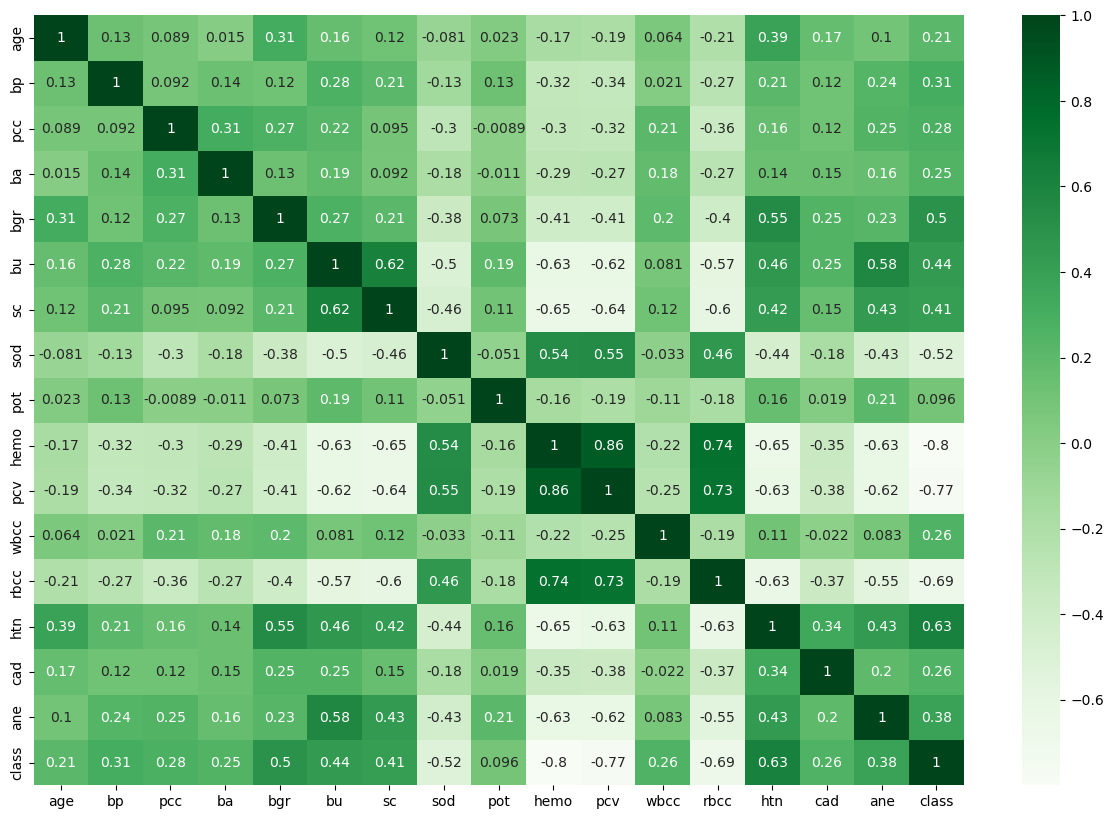

In [37]:
# Grafico de Correlacion de Pearson
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Greens')
plt.show()

In [39]:
matriz_corr = df.corr(method='pearson')
print(np.sqrt(matriz_corr.size))
np.abs(matriz_corr['class']) >= 0.6

17.0


age      False
bp       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo      True
pcv       True
wbcc     False
rbcc      True
htn       True
cad      False
ane      False
class     True
Name: class, dtype: bool

osea que tenemos con una correlacion arriba de 0.6 con la clase siendo:
- `rbcc`: cuenta de globulos rojos [millones/cmm]
- `pcv`: packed cell volume
- `hemo`: hemoglobina [gms]

## Actividad 2: PCA
Utilice PCA para determinar un conjunto reducido de variables de entrada al modelo.

Construya gráficos que muestren 2 de las nuevas dimensiones, con cada punto coloreado en base al target.

Separe el dataset en entrenamiento y testing y analice sus distribuciones.

## Actividad 3: Random Forest
Desarrolle un modelo, utilizando random forest, para clasificar si el paciente padece la enfermedad de riñón crónica, en base a (a) todas las variables originales y (b) sólo las componentes principales seleccionadas. Entrene usando el subconjunto de entrenamiento y alguna técnica de validación cruzada. 
Optimice los hiperparámetros para conseguir un "buen modelo".

## Actividad 4: Support Vector Machine
Repita la actividad 3, pero usando SVM. 

Discuta cuál de las metodologías (SVM, RF, todas las variables, PCs, etc.) proporcionó el mejor modelo, utilice el dataset de testing para este propósito.